In [2]:
#!/usr/bin/env python

In [3]:
import wuml 
from wplotlib import scatter

2021-11-18 11:01:00.394905: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
wuml.set_terminal_print_options(precision=3)
data = wuml.make_moons(n_samples=1500)

In [5]:
Pᵳ = wuml.flow(data, max_epochs=150, num_flows=10, network_width=1024, print_status=True)
probᵳ = Pᵳ(data)
samplesᵳ = Pᵳ.generate_samples(2000)
Pᵳ.save('flow.model')

	epoch: 149, Avg Loss: 1.2483, patience: 104

In [6]:
Pᴋ = wuml.KDE(data)
probᴋ = Pᴋ(data)
samplesᴋ = Pᴋ.generate_samples(2000)

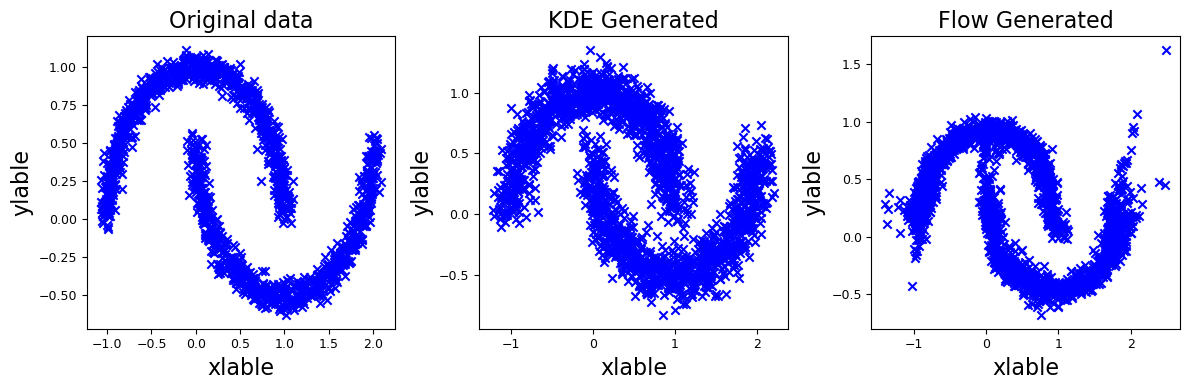

In [7]:
S = scatter(data.X[:,0], data.X[:,1], title='Original data', subplot=131, figsize=(12,4))
scatter(samplesᴋ.X[:,0], samplesᴋ.X[:,1], title='KDE Generated', subplot=132)
scatter(samplesᵳ.X[:,0], samplesᵳ.X[:,1], title='Flow Generated', subplot=133)
S.show()

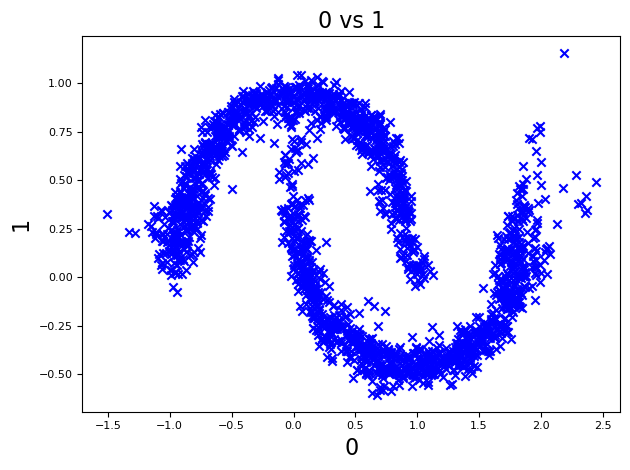

In [8]:
# If you have a saved model, you can reload them this way
Pᵳ2 = wuml.flow(data, load_model_path='flow.model')
samplesᵳ = Pᵳ2.generate_samples(2000)
#probᵳ = Pᵳ(data)
samplesᵳ.plot_2_columns_as_scatter(0, 1)